## Netflix Dataset Analysis and Recommendation System

This notebook will help analyze a Netflix dataset of movies and TV shows (up to 2019, sourced from Flixable) to group content into clusters using NLP techniques.

**The project goal is to enhance user experience and reduce subscriber churn (as if you were a data analyst at Netflix).**

#### Key Steps:

1. **Handling null values** and managing nested columns like `director`, `cast`, `country`, etc.
2. **Binning the rating attribute** into categories:
   - Adult
   - Children's
   - Family-friendly
   - Not rated
3. **Exploratory Data Analysis (EDA)** to uncover trends and insights in the streaming entertainment industry.
4. **Tokenizing, preprocessing, and vectorizing** key attributes (`director`, `cast`, `country`, `genre`, etc.) using the **TF-IDF** vectorizer.
5. **Dimensionality reduction** using **PCA** to improve performance.
6. **K-Means clustering** with 4 clusters, optimized through evaluation methods.
7. **Content-based recommender system** using a cosine similarity matrix to provide personalized recommendations.

#### Impact:

This analysis is expected to improve user satisfaction and retention for Netflix's 220+ million subscribers.


#### Terminology:
- **Exploratory Data Analysis (EDA)**:
The initial process of investigating datasets to summarize their main characteristics, often with visualizations, to uncover patterns, spot anomalies, and test hypotheses.

- **Tokenizing**:
Breaking down a text into smaller parts (tokens) such as words or phrases. In natural language processing (NLP), tokenization is used to prepare text data for analysis.

- **Vectorizing**:
Converting text data into numerical form so that machine learning algorithms can process it.

- **TF-IDF (Term Frequency-Inverse Document Frequency)**:
A way to measure how important a word is in a document compared to other documents in a group. It gives more weight to words that appear often in one document but not in many others, helping to focus on the most relevant keywords.

- **Dimensionality Reduction**:
A process used to reduce the number of features (variables) in a dataset while retaining essential information. PCA (Principal Component Analysis) is a popular method used to simplify data for better performance in clustering or machine learning tasks.

- **PCA (Principal Component Analysis)**:
A technique for reducing the dimensionality of datasets, increasing interpretability while minimizing information loss. It transforms the data into a new set of variables (principal components) that are uncorrelated and capture the maximum variance in the data.




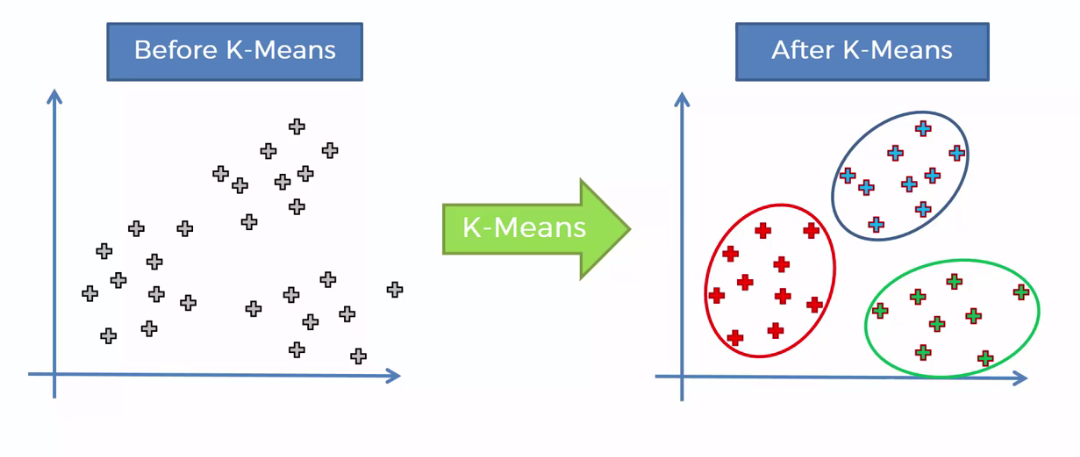

### DISCLAIMER: This workshop will focus on teaching you how to approach a machine learning problem, given the data. The specifics of the code will be less important than learning how to plan your project, ask the right questions, make the right high-level decisions, and then summarize your results.

#### Modern generative AI can be informative and helpful in writing out similar code, and hopefully this workshop can provide you with a method for creating similar projects with datasets available on Kaggle and other sites.

### Import Libraries

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install wordcloud
!pip install seaborn
!pip install plotly
!pip install nltk
!pip install scikit-learn
!pip install yellowbrick
!pip install scipy
!pip install joblib
!pip install datetime
!pip install statsmodels

In [ ]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go


# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

# libraries used for statistical tests
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Dataset Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Netflix ML Project/Netflix.csv')

In [ ]:
# First look
df.head()

Unnamed: 0 show_id     type  title           director  \
0           0      s1  TV Show     3%                NaN   
1           1      s2    Movie   7:19  Jorge Michel Grau   
2           2      s3    Movie  23:59       Gilbert Chan   
3           3      s4    Movie      9        Shane Acker   
4           4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Variables Description



The variable description of the Netflix Movies and TV Shows dataset from Flixable reads as:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

In [ ]:
# How many rows and columns are there in the dataset?
print(f"Rows and columns in the dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Rows and columns in the dataset: Rows= 7787, Columns= 13


In [ ]:
# Variable types within the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    7787 non-null   int64 
 1   show_id       7787 non-null   object
 2   type          7787 non-null   object
 3   title         7787 non-null   object
 4   director      5398 non-null   object
 5   cast          7069 non-null   object
 6   country       7280 non-null   object
 7   date_added    7777 non-null   object
 8   release_year  7787 non-null   int64 
 9   rating        7780 non-null   object
 10  duration      7787 non-null   object
 11  listed_in     7787 non-null   object
 12  description   7787 non-null   object
dtypes: int64(2), object(11)
memory usage: 791.0+ KB


In [ ]:
# How many duplicated values are in the dataset?
print(f"Number of duplicated observations in the dataset: {df.duplicated().sum()}")

Number of duplicated observations in the dataset: 0


In [ ]:
# Missing Values/Null Values Count
print("-"*50)
print("Null values present for each of variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null values present for each of variable: 
--------------------------------------------------
Unnamed: 0         0
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Unnamed: 0       0.000000
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


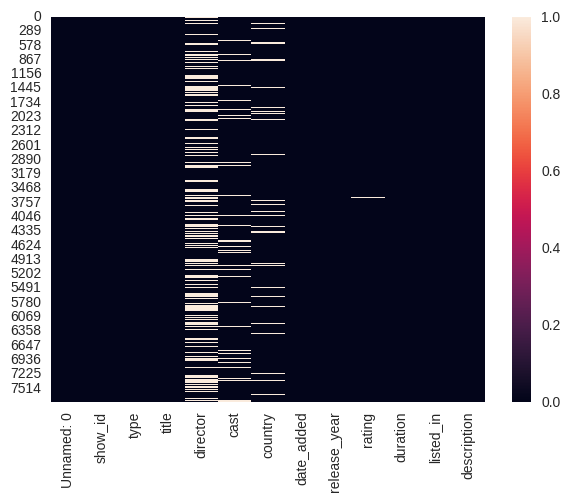

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))


sns.heatmap(df.isnull(), cbar=True)
plt.show()



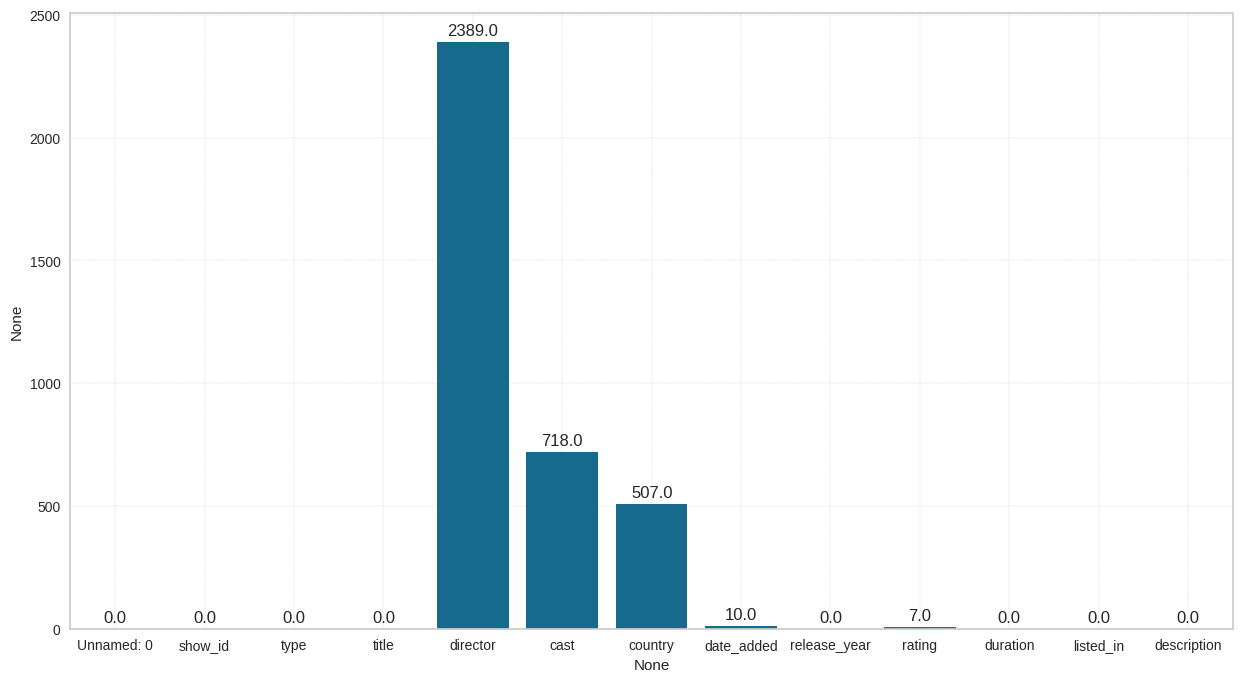

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

In [ ]:
# Statistical description of dataset
df.describe(include='all').T

count unique  \
Unnamed: 0    7787.0    NaN   
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
Unnamed: 0                                                  NaN   NaN   
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean          std     min     25%     50%     75%     max  
Unnamed: 0        3893.0  2248.057606     0.0  1946.5  3893.0  5839.5  7786.0  
show_id              NaN          NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN          NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN          NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN          NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN          NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN          NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN          NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258     8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN          NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN          NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN          NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN          NaN     NaN     NaN     NaN     NaN     NaN

In [ ]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'Unnamed: 0' : 7787
'show_id' : 7787
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6831
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


## Data Cleaning

In [ ]:
df["date_added"].value_counts()

date_added
January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: count, Length: 1565, dtype: int64

In [ ]:
df['rating'].value_counts()

rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [ ]:
df['country'].value_counts()

country
United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

Since the null count for 'date_added' and 'rating' is very low, we can drop those rows to prevent bias in the clustering model.

For 'director' and 'cast', where null percentages are higher, we'll replace missing values with 'unknown' to avoid dropping important data.

We'll fill null values in 'country' with the mode (likely 'US') since only 6% of the data is missing.

In [ ]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [ ]:
# Rechecking the Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Rechecking the percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Unnamed: 0      0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Unnamed: 0      0.0
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64%
--------------------------------------------------


#### Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [ ]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [ ]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

title              Directors
8339             Women of Mafia 2            Patryk Vega
7675                   Thottappan  Shanavas K. Bavakutty
6932            The Garfield Show                Unknown
8387                          XXx              Rob Cohen
3413                      Jezebel           Numa Perrier
7021               The Homecoming                Unknown
2812       Hannah Gadsby: Nanette                Jon Olb
3084  How to Get Away with Murder                Unknown
4329                 Memory Games           Janet Tobias
6773             The Consul's Son              Amr Arafa

In [ ]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

title                  Actors
7056                                  Black Crows             Aseel Omran
7298                                        Blaze           Josh Hamilton
37082                                 Revelations                  Chetan
34861                           Playing for Keeps    Catherine Zeta-Jones
51953  Trailer Park Boys: Countdown to Liquor Day      John Paul Tremblay
31460                     Mythily Veendum Varunnu            Shivani Bhai
52038                           Train of the Dead      Saowaluck Siriaran
53446                                      Unrest  Jessica Taylor-Bearman
21095                            Hurricane Bianca                  RuPaul
24918        Kung Fu Panda: Secrets of the Scroll              Tara Macri

In [ ]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)



title                   Genre
13271               The Alcàsser Murders  International TV Shows
16686                         Win It All      Independent Movies
14185               The Indian Detective  International TV Shows
7308                           Khalnayak    International Movies
117                   100 Days My Prince       Romantic TV Shows
4578   Fabulous Lives of Bollywood Wives              Reality TV
7924                               Lilli    International Movies
9441                     My Dear Warrior             TV Comedies
4771                           Fireworks          Anime Features
15879               Turkish Dance School                Comedies

In [ ]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

title        Country
4074         Kickboxer: Vengeance  United States
8078                 The Mad Monk      Hong Kong
7842          The House Next Door          India
6944           Splash and Bubbles  United States
7406            The Bleeding Edge      Australia
886                      Barbecue  United States
4627                        Macho         Mexico
4114                   King’s War          China
1970                  Dark Waters          Egypt
8775  Tracy Morgan: Staying Alive  United States

**Great, we have sucessfully separated the nested columns. Now let's just merge all the created dataframe into the single merged dataframe.**

## Merging Unnested Dataframes

In [ ]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

title            Actors Directors                   Genre Country
0    3%       João Miguel   Unknown  International TV Shows  Brazil
1    3%       João Miguel   Unknown               TV Dramas  Brazil
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil

Cool, now let's merge this dataframe with the original one on the left join to avoid information loss.

In [ ]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

title            Actors Directors                   Genre Country     type  \
0    3%       João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   
2  August 14, 2020          2020  TV-MA  4 Seasons   
3  August 14, 2020          2020  TV-MA  4 Seasons   
4  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

In [ ]:
# Checking dataset variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 14.8+ MB


In [ ]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extracting date, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Checking info of the dataset after typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         175807 non-null  object 
 1   Actors        175807 non-null  object 
 2   Directors     175807 non-null  object 
 3   Genre         175807 non-null  object 
 4   Country       175807 non-null  object 
 5   type          175807 non-null  object 
 6   release_year  175807 non-null  int64  
 7   rating        175807 non-null  object 
 8   duration      175807 non-null  int64  
 9   description   175807 non-null  object 
 10  day_added     174219 non-null  float64
 11  month_added   174219 non-null  float64
 12  year_added    174219 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 17.4+ MB


#### Binning of Rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.


**Let's not complicate it and create bins as following:**
* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}


df['rating'].replace(rating_map, inplace = True)


df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [ ]:
# Checking head after binning
df.head()

title            Actors Directors                   Genre Country     type  \
0    3%       João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

   release_year         rating  duration  \
0          2020  Adult Content         4   
1          2020  Adult Content         4   
2          2020  Adult Content         4   
3          2020  Adult Content         4   
4          2020  Adult Content         4   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...       14.0          8.0   
1  In a future where the elite inhabit an island ...       14.0          8.0   
2  In a future where the elite inhabit an island ...       14.0          8.0   
3  In a future where the elite inhabit an island ...       14.0          8.0   
4  In a future where the elite inhabit an island ...       14.0          8.0   

   year_added  
0      2020.0  
1      2020.0  
2      2020.0  
3      2020.0  
4      2020.0

#### 5. Separating Movies and TV Shows

In [ ]:
# Spearating the dataframes for further analysis
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


## Exploratory Data Analysis (EDA)

#### Movies vs TV Shows on Netflix

In [ ]:
# Chart - 1 visualization code

labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Pie Chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout

fig.update_layout(
    title_text='Proportions of Content on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)



The majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.


Business Insights:
- The Netflix Studios should more focus on quality movies because there is high competition in the market.
- TV Shows are less in numbers hence good opportunity for business.

#### Content Rating Distributions

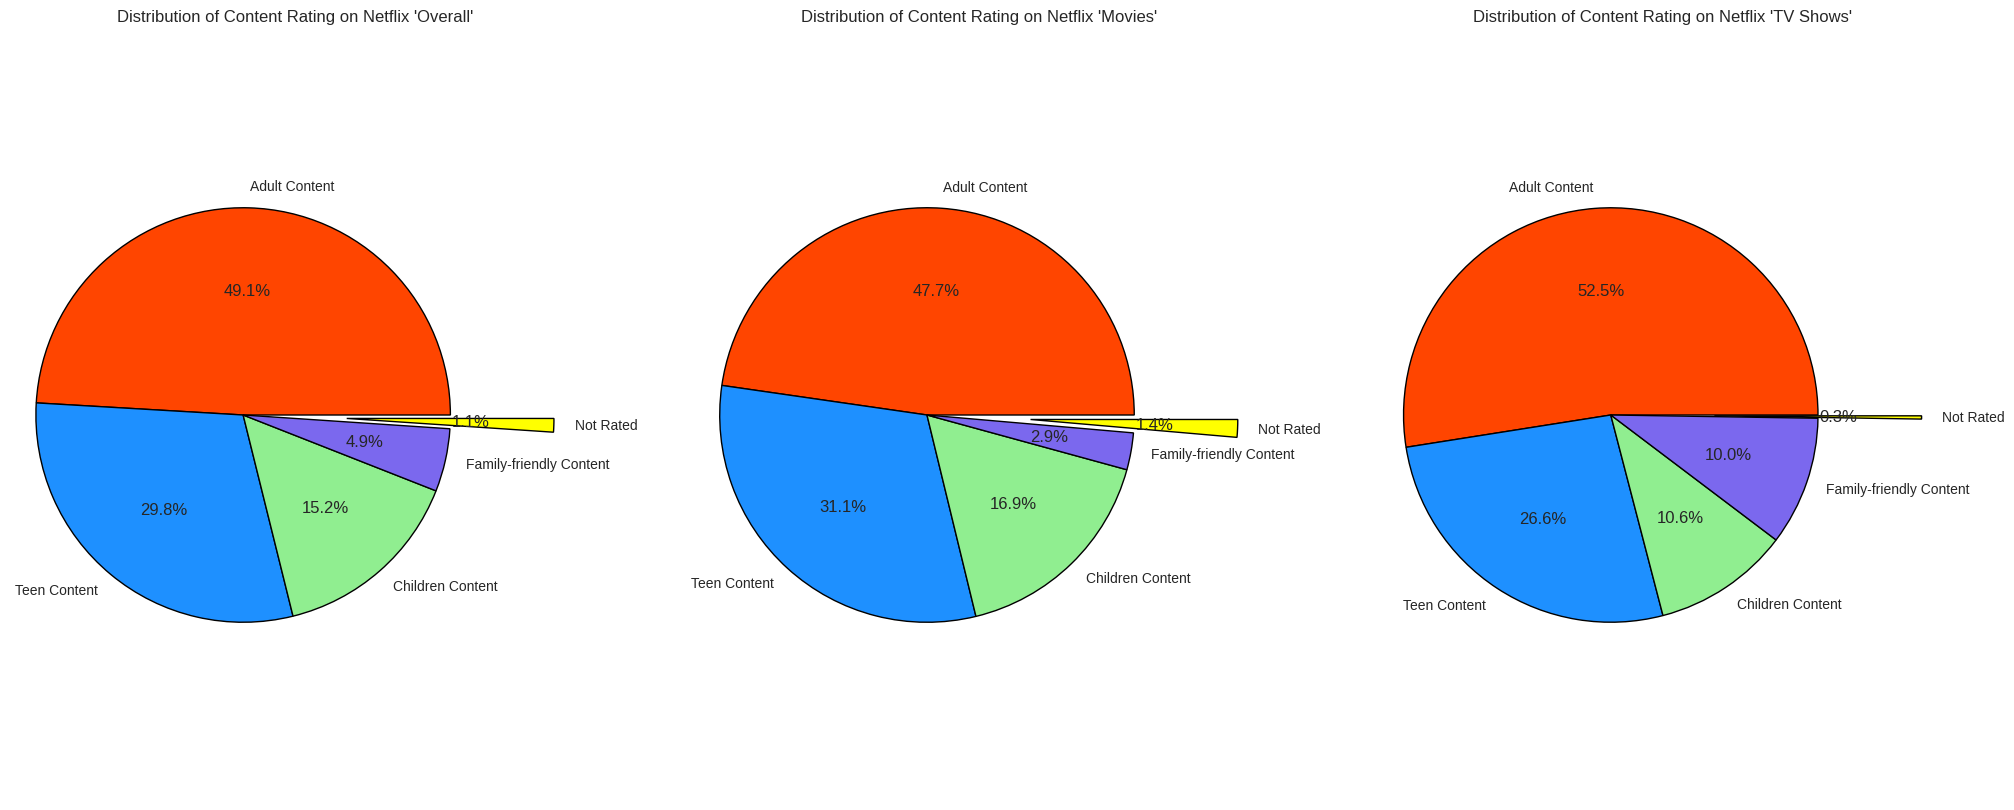

In [ ]:
plt.figure(figsize=(25,10))
for i,j,k in ((df, 'Overall',0),(df_movies, 'Movies',1),(df_tvshows, 'TV Shows',2)):
  plt.subplot(1,3,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['orangered','dodgerblue','lightgreen','mediumslateblue','yellow'],
          autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

Most video content on Netflix is Adult and teen-rated content.

Business Insight: There is an opportunity for Netflix to expand their content into children and family-friendly content.

#### Top 10 Countries Involved in Content Creation

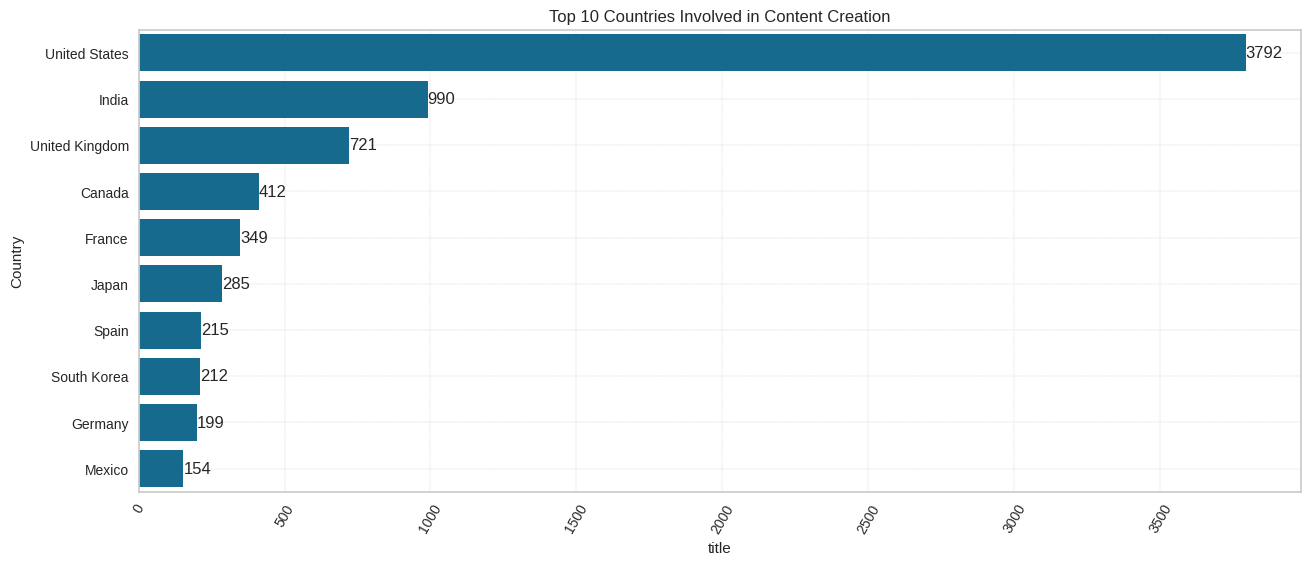

In [ ]:
df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries Involved in Content Creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()


The United States dominates Netflix's content production, followed by India, with notable contributions from Canada, France, and Japan.


Business insight: Netflix can grow by further investing in American and Bollywood content. Expanding into the South Korean market, with its rising global demand for K-dramas, offers significant growth potential.

#### Netflix Genre Popularity


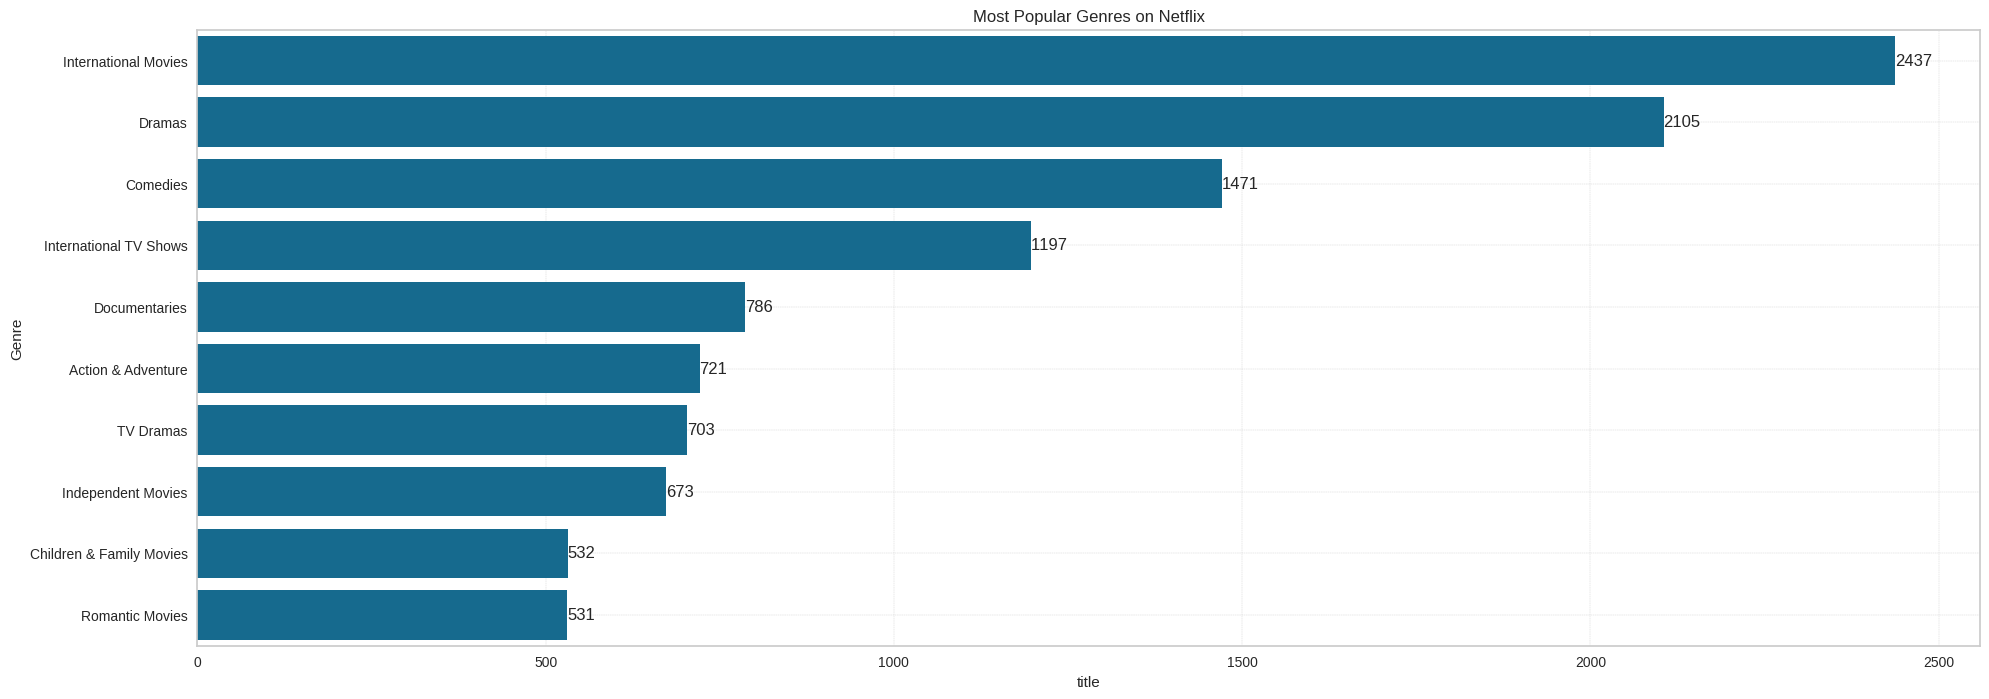

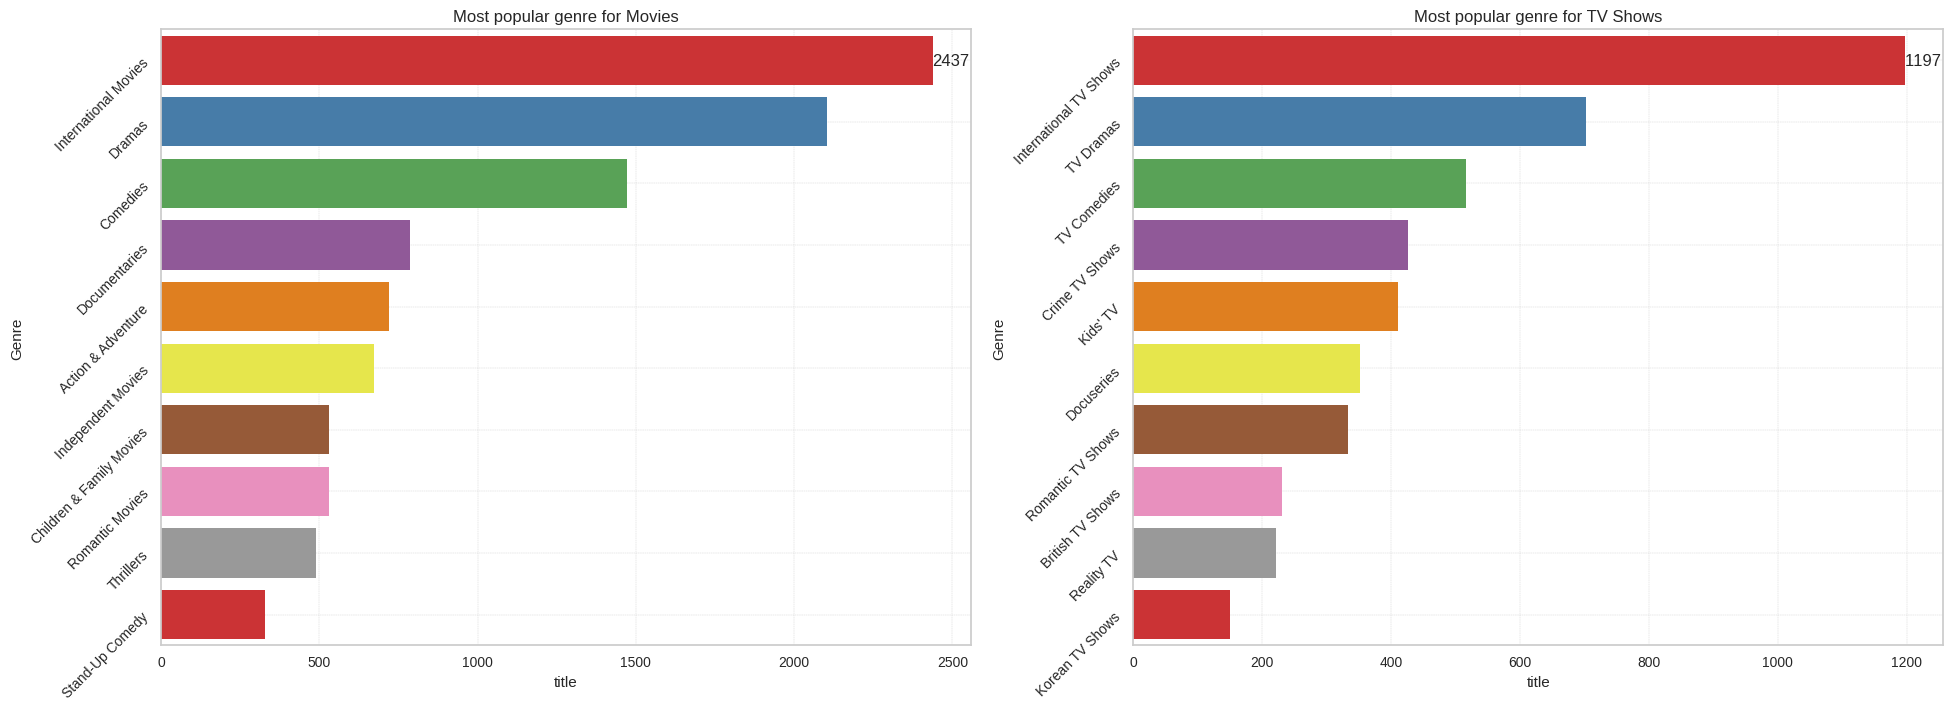

In [ ]:
plt.figure(figsize=(23,8))
df_genre = df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.title(f'Most Popular Genres on Netflix')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre for {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

This helps us to identify which genres of content might be over-saturated, or are at risk of becoming saturated.

Business Insight: Netflix would likely stand to benefit from producing or acquring licenses to more of the under-represented genres, such as thrillers, stand-up comedy, and romantic movies and TV shows.





#### Content Releases and Content Additions, by Year

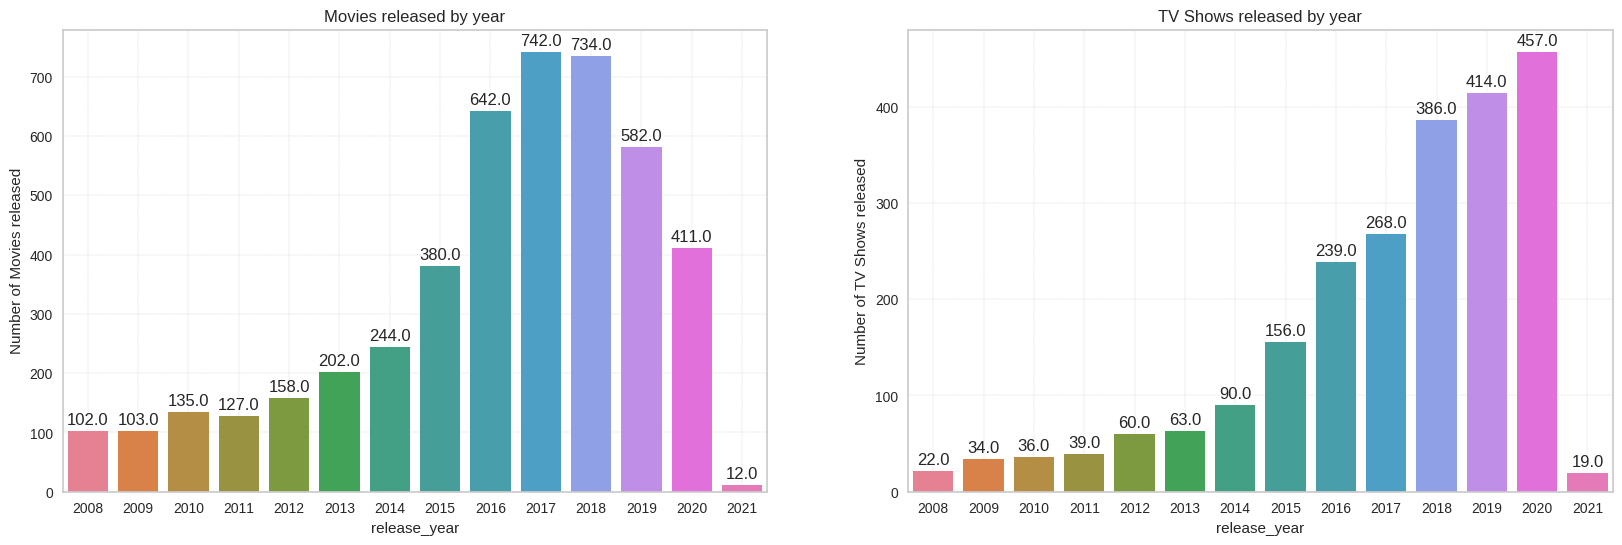

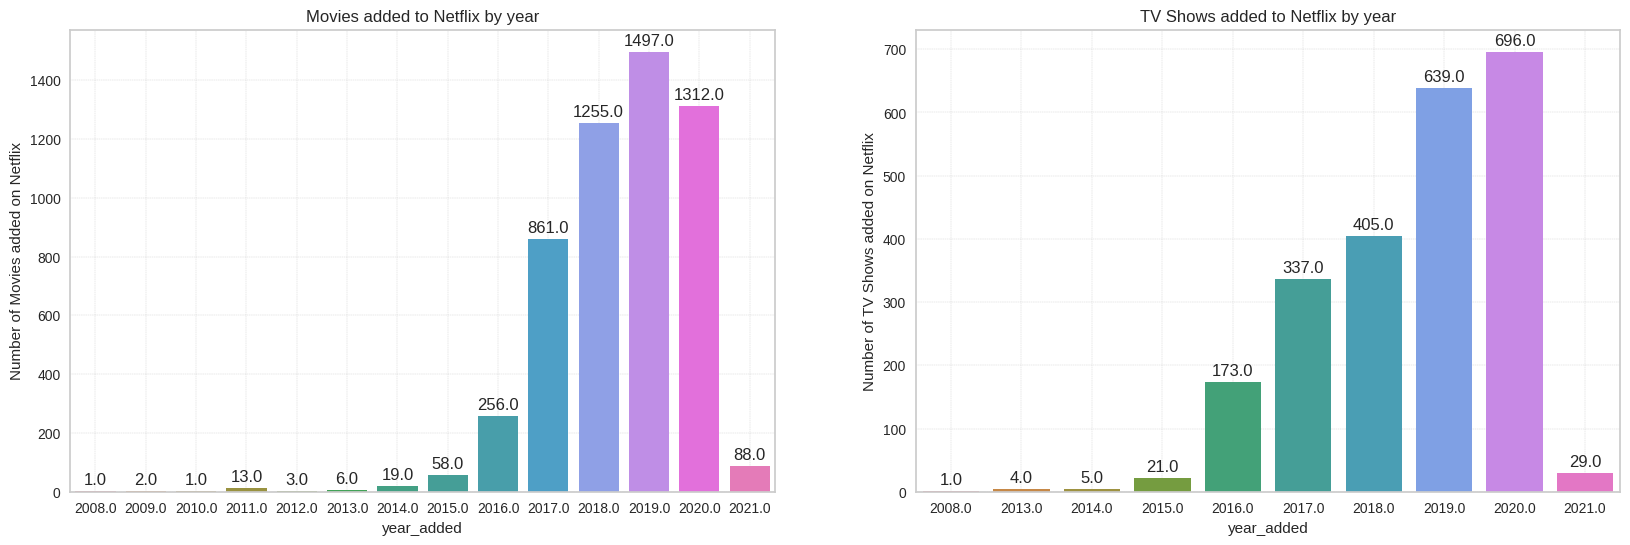

In [ ]:
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

plt.show()


Netflix's content additions have increased yearly, but since 2018, movie releases have decreased while TV shows have risen sharply. In 2020, fewer movies and more TV shows were added compared to 2019.








Business Insight: This suggests a strategic shift by Netflix toward prioritizing TV shows over movies, likely due to higher viewer engagement and retention. Focusing on producing more TV shows could further enhance subscriber growth and reduce churn.

#### Movie Duration on Netflix


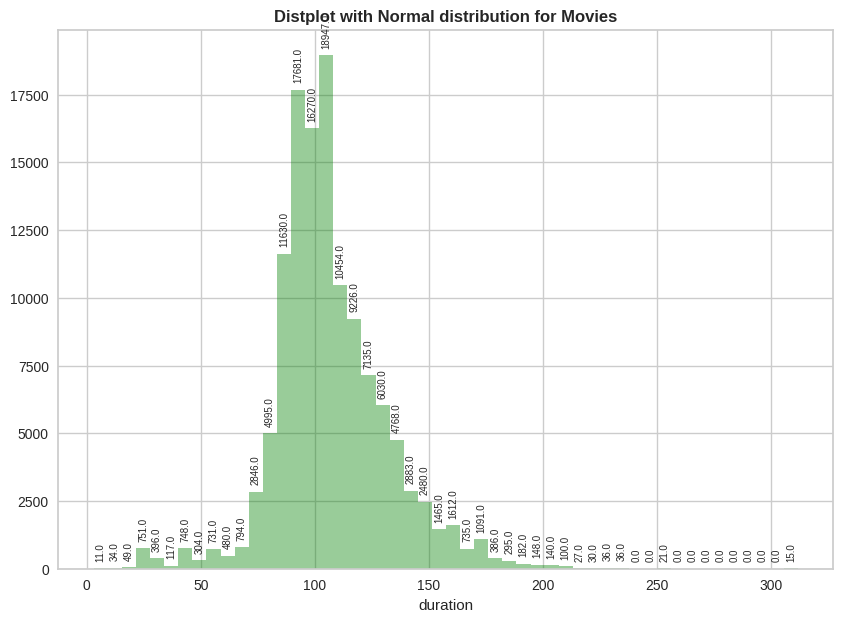

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
plots= sns.distplot(df_movies['duration'],kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=7, xytext=(0, 5),
                  textcoords='offset points', rotation=90)
plt.show()

The histogram of the distribution of movie durations in minutes on Netflix shows that the majority of movies on Netflix have a duration between 80 to 120 minutes.

Business Insight: It is clear that existing movies on Netflix closely follow this pattern, and so this pattern should inform future movies on the platform.

## Statistical Analysis (Hypothesis Testing)

### Hypothesis Test 1

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

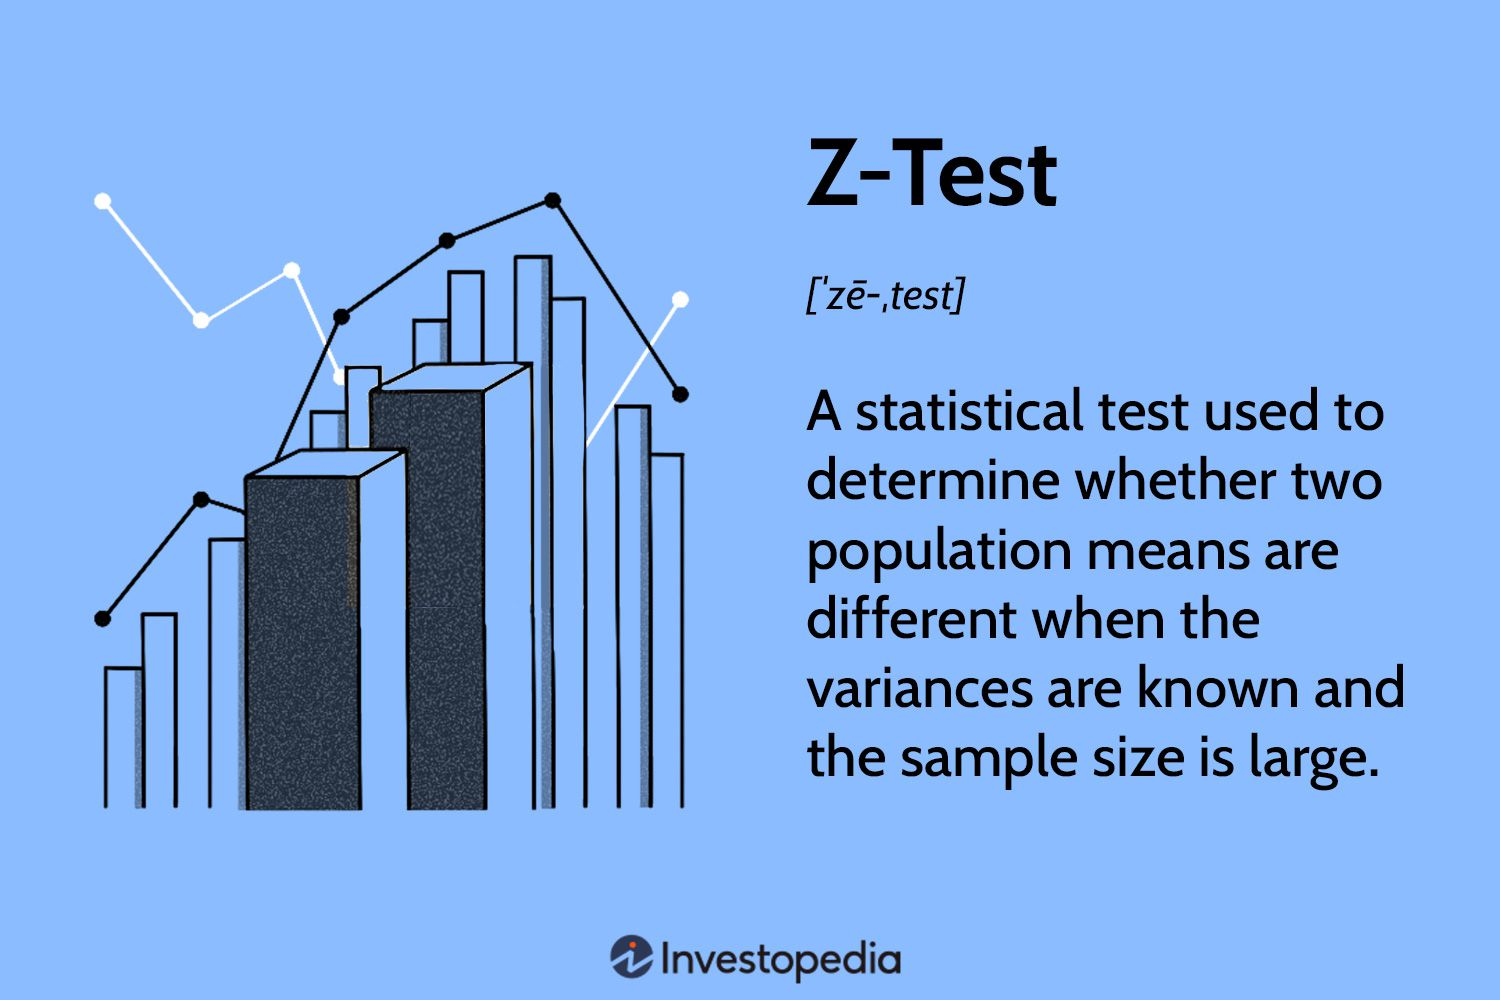

In [ ]:
# Perform Statistical Test to obtain P-Value

# Subset the data to only include drama and comedy movies
subset = df[df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")

else:
    print(f"Fail to reject the null hypothesis.")



z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

### Hypothesis Test 2


**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

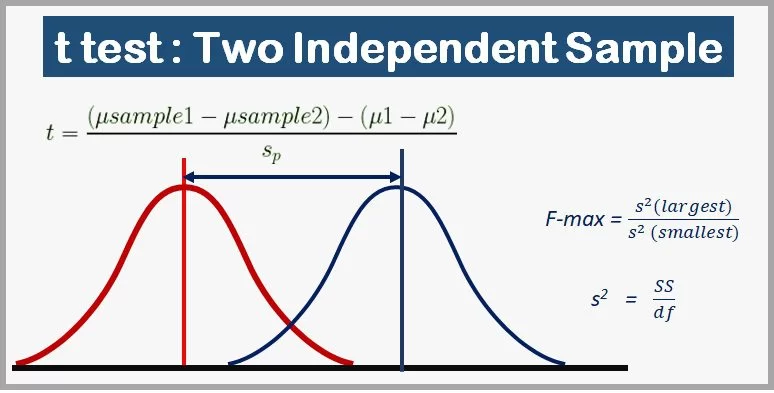

In [ ]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  -6.002151232542292
p-value:  7.23381843379902e-09
Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


## Data Pre-Processing and Feature Engineering

#### Textual Data Preprocessing

In [ ]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df.shape, df_new.shape

((175807, 13), (7770, 13))

In [ ]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.sample(2)

Unnamed: 0 show_id     type          title director  \
2612        2612   s2613  TV Show     Happy Jail  Unknown   
6565        6565   s6566  TV Show  The Last O.G.  Unknown   

                                                   cast        country  \
2612                                            Unknown  United States   
6565  Tracy Morgan, Tiffany Haddish, Cedric the Ente...  United States   

            date_added  release_year         rating   duration  \
2612   August 14, 2019          2019  Adult Content   1 Season   
6565  December 4, 2019          2019  Adult Content  2 Seasons   

                       listed_in  \
2612  Crime TV Shows, Docuseries   
6565                 TV Comedies   

                                            description  
2612  The Philippine jail known for a viral Michael ...  
6565  After 15 years behind bars, a kindhearted ex-d...

Adding a text column

In [ ]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)

Unnamed: 0 show_id     type  title           director  \
0           0      s1  TV Show     3%            Unknown   
1           1      s2    Movie   7:19  Jorge Michel Grau   
2           2      s3    Movie  23:59       Gilbert Chan   
3           3      s4    Movie      9        Shane Acker   
4           4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  
0  João Miguel, Bianca Comparato, Michel Gomes, R...  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

Lowercasing

In [ ]:
# Making all the text in new column lowercase
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema a. l. vijay comedies, international movies, sci-fi & fantasy movie teen content india due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

Removing Punctuation

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)


df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

Removing URLs, Removing Words and Digits That Contain Digits.

In [ ]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

Removing Stopwords, Removing Whitespaces

In [ ]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [ ]:
df_new['content_detail'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown international tv shows tv dramas tv scifi fantasy tv show adult content brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### Tokenization of Text Data

In [ ]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)




# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'l',
 'vijay',
 'comedies',
 'international',
 'movies',
 'scifi',
 'fantasy',
 'movie',
 'teen',
 'content',
 'india',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

#### Normalizing Text

Lemmatization looks at the meaning of the word and its context to produce a more accurate base form. Also works with multiple languages.

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedy international movie scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

#### Part of Speech Tagging

In [ ]:
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head(5)

Unnamed: 0 show_id     type  title           director  \
0           0      s1  TV Show     3%            Unknown   
1           1      s2    Movie   7:19  Jorge Michel Grau   
2           2      s3    Movie  23:59       Gilbert Chan   
3           3      s4    Movie      9        Shane Acker   
4           4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...  
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...  
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...  
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...  
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...

#### Text Vectorization

In [ ]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [ ]:
# Fitting on TfidfVectorizer

x= tfidfv.fit_transform(df_new['content_detail'])



# Checking shape of the formed document matrix
print(x.shape)

(7770, 30000)


#### Dimesionality Reduction

The vectors we are working with have 30,000 attributes. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

I used the code below on my own notebook instance to perform PCA over a large number of components and test for the best one. Here is the commented code that I used.

In [ ]:
# Dimensionality Reduction
# Importing PCA from sklearn
# from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
# pca = PCA()

# # Fitting the PCA model
# pca.fit(x.toarray())

# # percent of variance captured by each component
# variance = pca.explained_variance_ratio_
# print(f"Explained variance: {variance}")

In [ ]:
# # Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
# fig, ax = plt.subplots()
# ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
# ax.set_xlabel('Number of Components')
# ax.set_ylabel('Percent of Variance Captured')
# ax.set_title('PCA Analysis')
# plt.grid(linestyle='--', linewidth=0.3)
# plt.show()

My results informed me that the optimal number of dimensions is 7700. I fitted a PCA model with this result, and saved it to save time, since this is an intense computation. It will be imported below.

In [ ]:
import joblib
pca_tuned = joblib.load('/content/drive/My Drive/Netflix ML Project/pca_model.pkl')

x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7770, 5997)

## ML Model Implementation
### Unsupervised Learning: K-Means Clustering

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

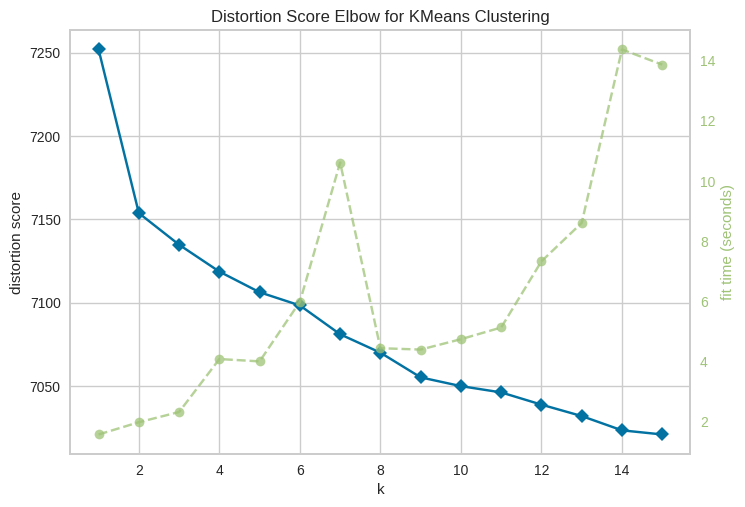

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer

visualizer.fit(x_transformed)


# Finalize and render the figure
visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before proceeding, let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

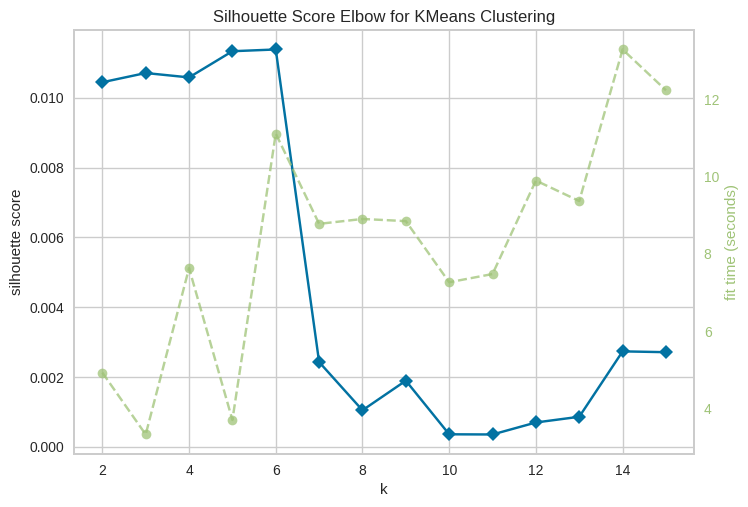

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.010375
k=3, Silhouette score=0.010169
k=4, Silhouette score=0.009538
k=5, Silhouette score=0.011004
k=6, Silhouette score=0.003388


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will use a K-Means model with 4 clusters.

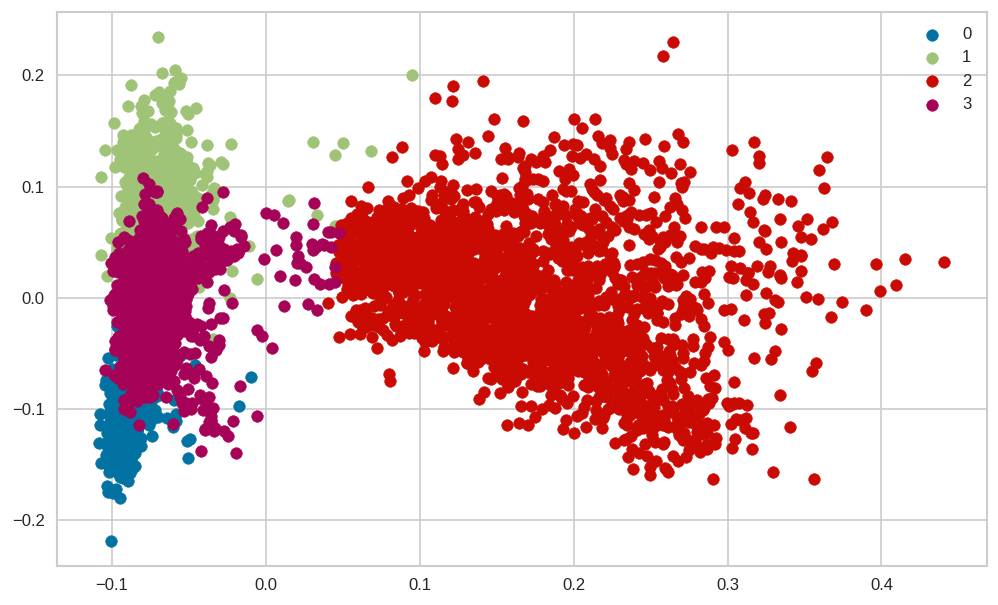

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

This is 2-Dimensional. Let's view it in 3 dimensions.

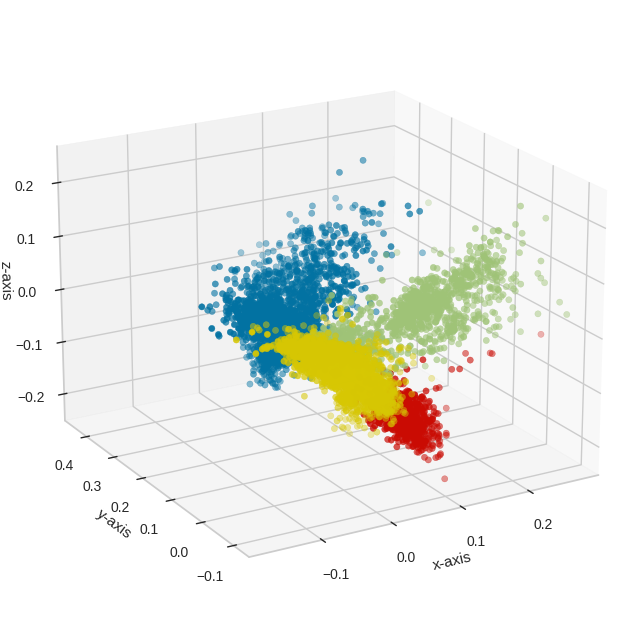

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()

Now, Now let's assign the 'Content' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
df_new['kmeans_cluster'] = kmeans.labels_

### Model Performance

Let's plot a wordcloud of the text columns for each defined cluster.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_new[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

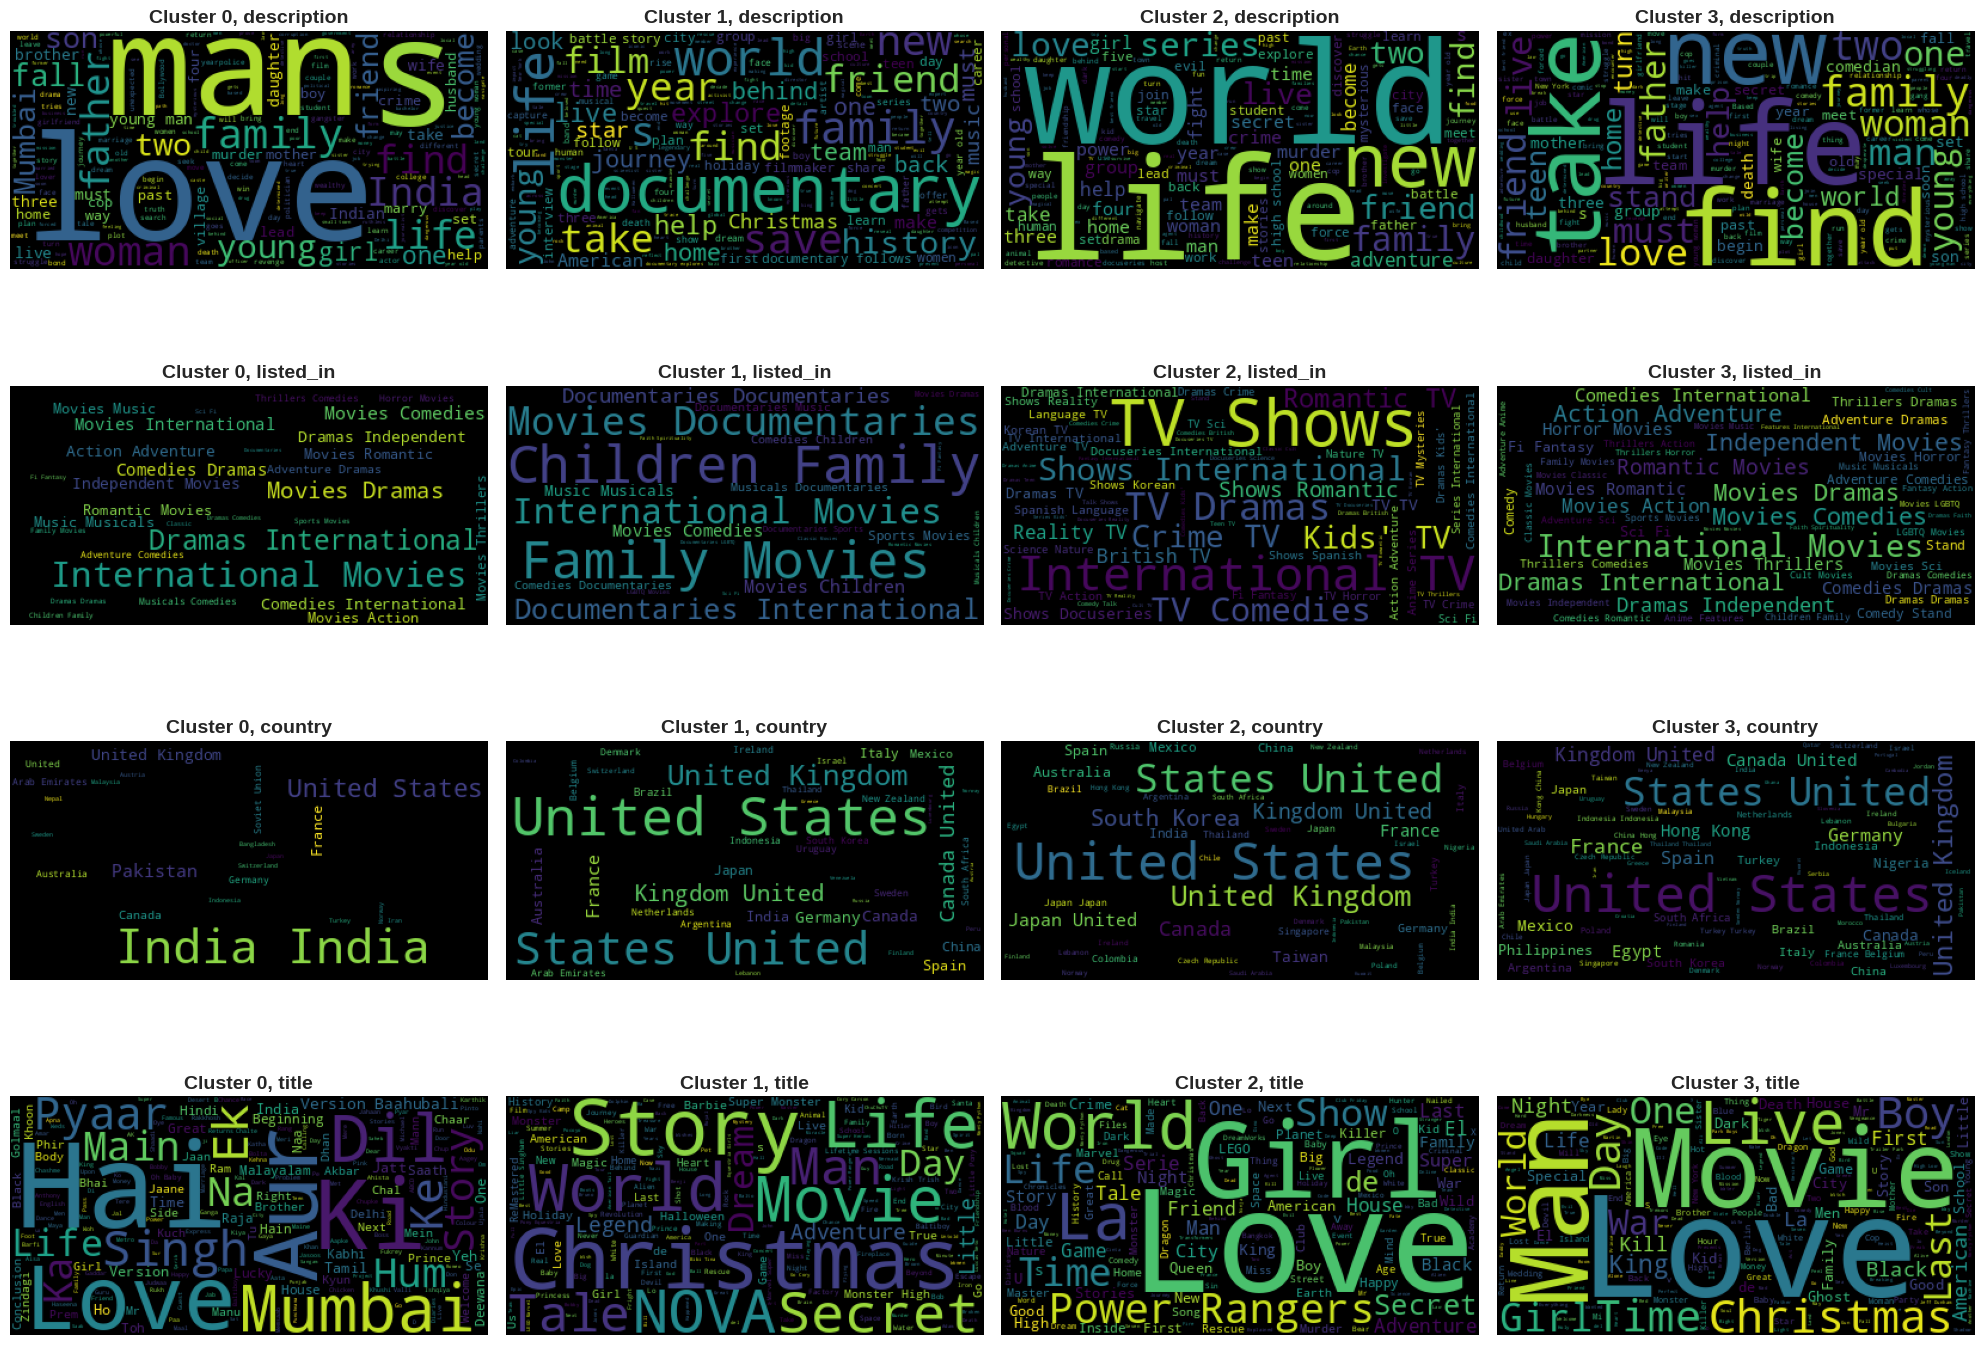

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()



## New Model - Recommendation System



We use cosine similarity to measure the similarity between documents by calculating the cosine of the angle between their vector representations, capturing how similar their word usage is. Unlike TF-IDF, cosine similarity is better suited for high-dimensional sparse data and considers the overall meaning of the text, even if word order differs.

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])


    return rec_table

Let's check how our recommender system is performing.

Good examples:

In [ ]:
recommend_content('GoodFellas')

Recommendation  Similarity_score(0-1)
0  The Irishman: In Conversation                 0.2870
1                    Raging Bull                 0.2458
2              Kill the Irishman                 0.2104
3                   The Irishman                 0.2084
4                   Mean Streets                 0.1698
5                 Prelude to War                 0.1442
6                    Taxi Driver                 0.1266
7            Catch Me If You Can                 0.1182
8                    The Brawler                 0.1177
9                         5 to 7                 0.1078

In [ ]:
recommend_content('Zombieland')

Recommendation  Similarity_score(0-1)
0     30 Minutes or Less                 0.1600
1                Kingpin                 0.1121
2        No Reservations                 0.1113
3          THE RUM DIARY                 0.1020
4            Night Moves                 0.1013
5    The End of the Tour                 0.0925
6                   Hush                 0.0923
7  The Edge of Seventeen                 0.0877
8             Santa Girl                 0.0874
9        Kiss the Ground                 0.0874

In [ ]:
recommend_content('Godzilla')

Recommendation  Similarity_score(0-1)
0  GODZILLA City on the Edge of Battle                 0.6912
1            GODZILLA The Planet Eater                 0.6608
2                               BLAME!                 0.3280
3             JoJo's Bizarre Adventure                 0.2803
4                                    K                 0.2655
5            Monthly Girls' Nozaki Kun                 0.2452
6                               Levius                 0.2424
7           Cagaster of an Insect Cage                 0.2288
8         Magi: The Labyrinth of Magic                 0.2224
9                        Blue Exorcist                 0.2061

In [ ]:
recommend_content('How to Get Away with Murder')

Recommendation  Similarity_score(0-1)
0  Lo que la verdad esconde: El caso Asunta (Oper...                 0.1449
1                                     Killer Ratings                 0.1448
2                                      The Staircase                 0.1296
3                  Gilmore Girls: A Year in the Life                 0.1250
4                        Anjaan: Special Crimes Unit                 0.1236
5                                    Cold Case Files                 0.1200
6                                             Scream                 0.1200
7                               The Confession Tapes                 0.1188
8                                               Troy                 0.1185
9                                    Shadow of Truth                 0.1179

In [ ]:
recommend_content('Grey\'s Anatomy')

Recommendation  Similarity_score(0-1)
0                        Lenox Hill                 0.1261
1                  The English Game                 0.1177
2                    Family Reunion                 0.1097
3     How to Make an American Quilt                 0.1037
4  Melodies of Life - Born This Way                 0.1010
5                           The 100                 0.0922
6                    13 Reasons Why                 0.0912
7                        Turbo FAST                 0.0905
8                           Killers                 0.0883
9                   The Night Shift                 0.0882

In [ ]:
recommend_content('Naruto')

Recommendation  Similarity_score(0-1)
0                  Naruto Shippûden the Movie: Bonds                 0.3836
1                    Naruto Shippuden : Blood Prison                 0.3517
2   Naruto the Movie 2: Legend of the Stone of Gelel                 0.3322
3                        Naruto Shippuden: The Movie                 0.3305
4       Naruto Shippûden the Movie: The Will of Fire                 0.2743
5  Naruto the Movie 3: Guardians of the Crescent ...                 0.2377
6        Naruto Shippuden: The Movie: The Lost Tower                 0.1821
7                            Marvel Anime: Wolverine                 0.1670
8                       Saint Seiya: The Lost Canvas                 0.1601
9                                     Dragon's Dogma                 0.1589

Questionable examples:

In [ ]:
recommend_content('Vampires')

Recommendation  Similarity_score(0-1)
0         The World Is Yours                 0.1429
1                   Dinotrux                 0.1217
2          Inhuman Resources                 0.1194
3                   Real Rob                 0.1182
4                    Dracula                 0.1164
5                      Balto                 0.1149
6                    Divines                 0.1100
7  My Babysitter's a Vampire                 0.1042
8       The Umbrella Academy                 0.1037
9              The Originals                 0.1019

In [ ]:
recommend_content('The Office (U.S.)')

Recommendation  Similarity_score(0-1)
0                     Haters Back Off                 0.1117
1                        Mr. Iglesias                 0.0983
2     The Boss Baby: Back in Business                 0.0975
3                              The OA                 0.0960
4                          Ink Master                 0.0944
5                         The Founder                 0.0935
6                           Champions                 0.0889
7  LEGO Ninjago: Masters of Spinjitzu                 0.0878
8               Kevin Hart: What Now?                 0.0878
9                        Miss Stevens                 0.0855

In [ ]:
recommend_content('Free Willy')

Recommendation  Similarity_score(0-1)
0                         The Next Karate Kid                 0.1119
1                             We, the Marines                 0.1065
2                Tremors 4: The Legend Begins                 0.1039
3               Tremors 3: Back to Perfection                 0.0969
4                                Total Recall                 0.0913
5                           Kill Bill: Vol. 2                 0.0900
6                                   Blackfish                 0.0893
7                     Orange Is the New Black                 0.0882
8  El Especial de Alex Fernández, el Especial                 0.0877
9         The Hateful Eight: Extended Version                 0.0877

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score** over **Distortion Score (also known as inertia or sum of squared distances)** as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* **Silhouette score is less sensitive to the shape of the clusters**, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered **K-means** as our final model, as we are getting the comparatevely **high Silhoutte Score in K-means clustering** and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

# **Conclusion**

### **Conclusions drawn from ML Model**

* Implemented **K-Means Clustering and Agglomerative Hierarchical Clustering**, to cluster the Netflix Movies TV show dataset.
* The optimal number of clusters we are getting from **K-means is 4**.
* We chose **Silhouette Score as the evaluation metric** over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
* Built a **Recommendation system** that can help Netflix **improve user experience and reduce subscriber churn** by providing personalized recommendations to users based on their similarity scores.

###  Areas for Future Development

- Could be improved by integrating this dataset with external sources such as IMDB ratings, books clustering, and more. A richer dataset might be preferable.

- By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread usage.

- The clustering might also be improved for our text if a more specific subset of the data is used, such as only U.S. movies, or only movies after 1995.

## Thank you!!!